Object Detection with Python, Deep Learning, and OpenCV

In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [3]:
model = cv2.dnn_DetectionModel(frozen_model, config_file)

In [4]:
classLabels=[]
file_name='labels.txt'
with open(file_name,'rt') as fpt:
  classLabels=fpt.read().rstrip('\n').split('\n')

In [5]:
print(classLabels)

['background', 'tench, Tinca tinca', 'goldfish, Carassius auratus', 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias', 'tiger shark, Galeocerdo cuvieri', 'hammerhead, hammerhead shark', 'electric ray, crampfish, numbfish, torpedo', 'stingray', 'cock', 'hen', 'ostrich, Struthio camelus', 'brambling, Fringilla montifringilla', 'goldfinch, Carduelis carduelis', 'house finch, linnet, Carpodacus mexicanus', 'junco, snowbird', 'indigo bunting, indigo finch, indigo bird, Passerina cyanea', 'robin, American robin, Turdus migratorius', 'bulbul', 'jay', 'magpie', 'chickadee', 'water ouzel, dipper', 'kite', 'bald eagle, American eagle, Haliaeetus leucocephalus', 'vulture', 'great grey owl, great gray owl, Strix nebulosa', 'European fire salamander, Salamandra salamandra', 'common newt, Triturus vulgaris', 'eft', 'spotted salamander, Ambystoma maculatum', 'axolotl, mud puppy, Ambystoma mexicanum', 'bullfrog, Rana catesbeiana', 'tree frog, tree-frog', 'tailed fro

In [6]:
print(len(classLabels))

1001


In [7]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127,5,127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 000002BF77480FB0>

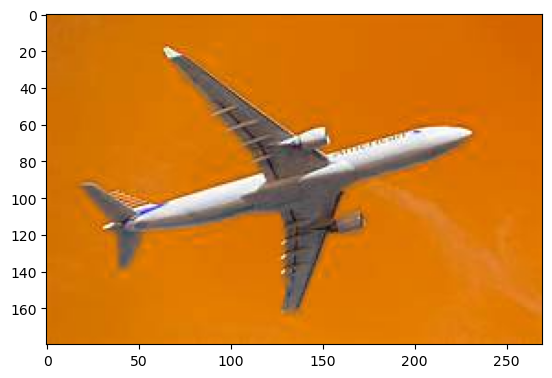

In [8]:
img = cv2.imread('airplane.jpeg')
plt.imshow(img)

In [9]:
ClassIndex,Confidece,bbox=model.detect(img, confThreshold=0.5)

In [10]:
print(ClassIndex)

[5]


In [11]:
font_scale=3
font=cv2.FONT_HERSHEY_PLAIN
for ClassInd,conf,boxes in zip(ClassIndex.flatten(),Confidece.flatten(),bbox):
  cv2.rectangle(img,boxes,(255,0,0),2)
  cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+10),font,fontScale=font_scale,color=(0))

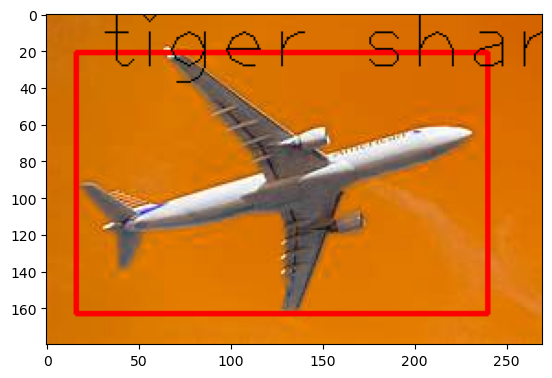

In [12]:
plt.imshow(img)